# Design Questions

1) I built a course_info table, an instructors table, a learning_outcomes table, and a terms_with_courses table. 

2) The primary key for the courses_info table is class_code. The primary key for instructors is the Instructor_Name. The learning_outcomes table primary key is course_name and learning_outcome. The terms_with_courses table has a primary key of term_name, class_code, and instructor.


3) For the terms with courses table, the foreign keys are the class code must be a valid class code in the classes table and the instructor must be a vald instructor in the Instructors table. In the LearningOutcomes table, the course name must be a valid course name in the classes table. 

4) The learning outcome being active or not can be updated via the Active column which is a bit column. 

5) I have already attempted to normalize the database by eliminating redundancy. I suppose that I could separate out classes and if there are any learning outcomes that are used by two courses, this could also be normalized. 

6) I do not plan to build any indexes. 

7) The constraints that need to be inforced are just the foreign and primary keys. 

8) See below. 

9) I would probably add a "Residential/Online" column to the terms_with_courses table. 



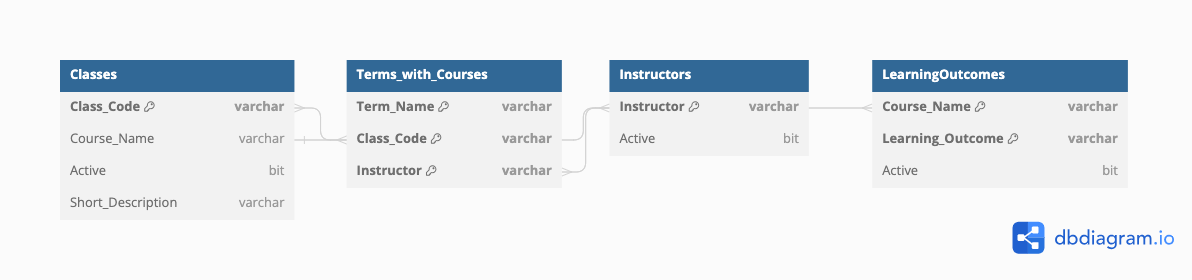

In [2]:
from IPython.display import Image
Image(filename = "./UVA Courses.png")

# Use Case Questions

Answers are in Views of LAB01_XJB6YB of the snowflake database. 

In [3]:
-- Q1)
select class_code, course_name
from course_info
WHERE Active = TRUE

-- Q2)
select class_code, course_name
from course_info
WHERE Active = FALSE

-- Q3)
select Instructors
from instructors
WHERE Active = FALSE

-- Q4)
select COURSE_CODE, count(*) as N
from learning_outcomes
group by COURSE_CODE

-- Q5)
select DISTINCT CLASS_CODE
from course_info
LEFT JOIN learning_outcomes
ON course_info.CLASS_CODE = learning_outcomes.COURSE_CODE
WHERE learning_outcomes.LEARNING_OUTCOME IS null

-- Q6)
select learning_outcomes.COURSE_CODE, course_info.course_name, learning_outcomes.LEARNING_OUTCOME
from course_info
LEFT JOIN learning_outcomes
ON course_info.class_code =  learning_outcomes.COURSE_CODE
WHERE learning_outcomes.LEARNING_OUTCOME LIKE '%SQL%' 
OR learning_outcomes.LEARNING_OUTCOME LIKE 'SQL%' 
OR learning_outcomes.LEARNING_OUTCOME LIKE '%SQL' 

-- Q7)
select instructor
from terms_with_courses
WHERE Class_Code = 'DS5100'
AND Term_Name = 'Summer 2021'

-- Q8)
select DISTINCT Instructor
from terms_with_courses
WHERE Term_Name = 'Fall 2021'
ORDER BY Instructor

-- Q9)
select Term_Name, Instructor, Count(*) as N
from terms_with_courses
GROUP BY Term_Name, Instructor
ORDER BY Term_Name, Instructor

-- Q10a)
select class_code, Term_Name
from terms_with_courses
GROUP BY class_code, Term_Name
HAVING COUNT(Instructor) > 1

-- Q10b)
select class_code, Term_Name, Instructor
from terms_with_courses
WHERE Instructor NOT IN ('Raf Alvarado', 'Teague Henry')
GROUP BY class_code, Term_Name, Instructor
HAVING COUNT(Instructor) > 1

SyntaxError: unmatched ')' (1637270702.py, line 1)